<a href="https://colab.research.google.com/github/jisoojungx/QC/blob/main/VibeAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vibration meter data generation

In [5]:
import pandas as pd
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic vibration data
num_samples = 100
time = pd.date_range(start='2024-12-18', periods=num_samples, freq='H')
vibration = np.random.normal(loc=50, scale=10, size=num_samples)  # Normal distribution with mean=50, std=10

# Add some anomalies to simulate real-world issues
anomaly_indices = np.random.choice(num_samples, size=5, replace=False)
vibration[anomaly_indices] += np.random.uniform(20, 40, size=5)  # Add spikes to simulate anomalies

# Create a DataFrame
data = pd.DataFrame({
    'Timestamp': time,
    'Vibration': vibration
})

# Save the DataFrame to a CSV file
data.to_csv('ac_compressor_vibration_data.csv', index=False)

# Display the first few rows of the DataFrame
print(data.head())

            Timestamp  Vibration
0 2024-12-18 00:00:00  54.967142
1 2024-12-18 01:00:00  48.617357
2 2024-12-18 02:00:00  56.476885
3 2024-12-18 03:00:00  65.230299
4 2024-12-18 04:00:00  47.658466


<ipython-input-5-6eb29a5d8b74>:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time = pd.date_range(start='2024-12-18', periods=num_samples, freq='H')


<ipython-input-4-b23fde742296>:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


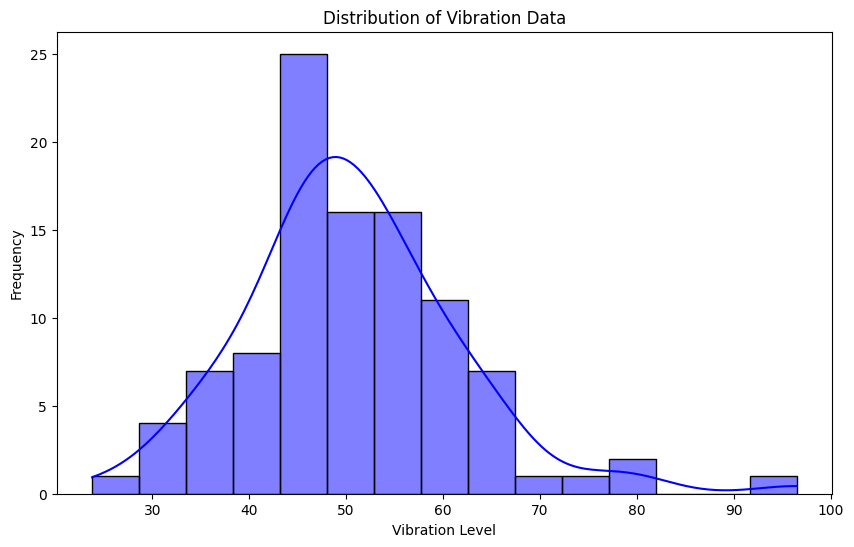

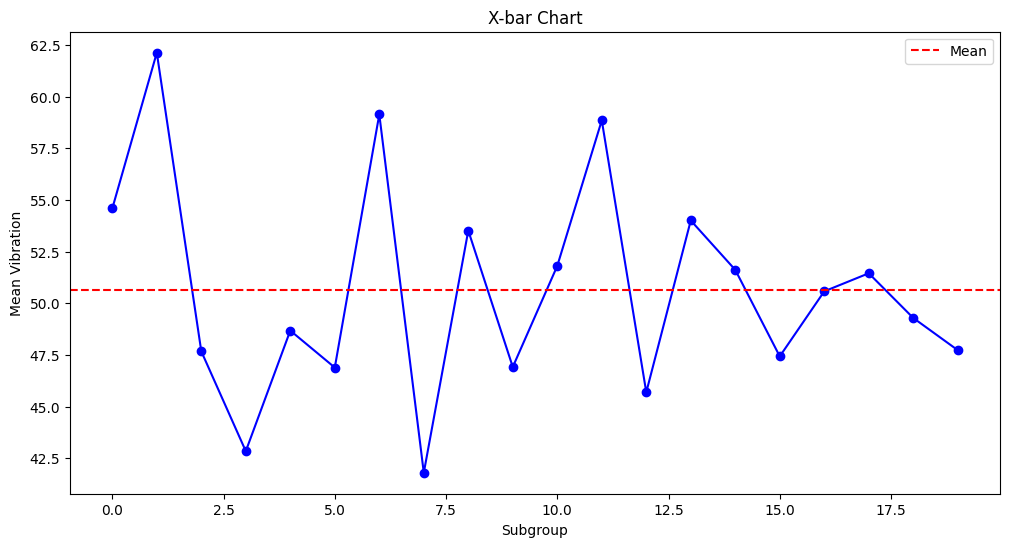

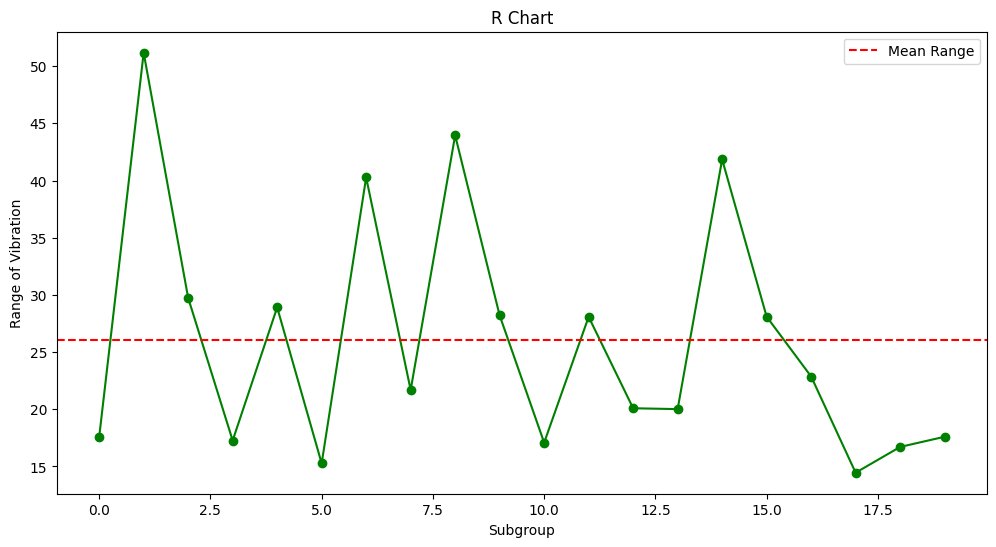

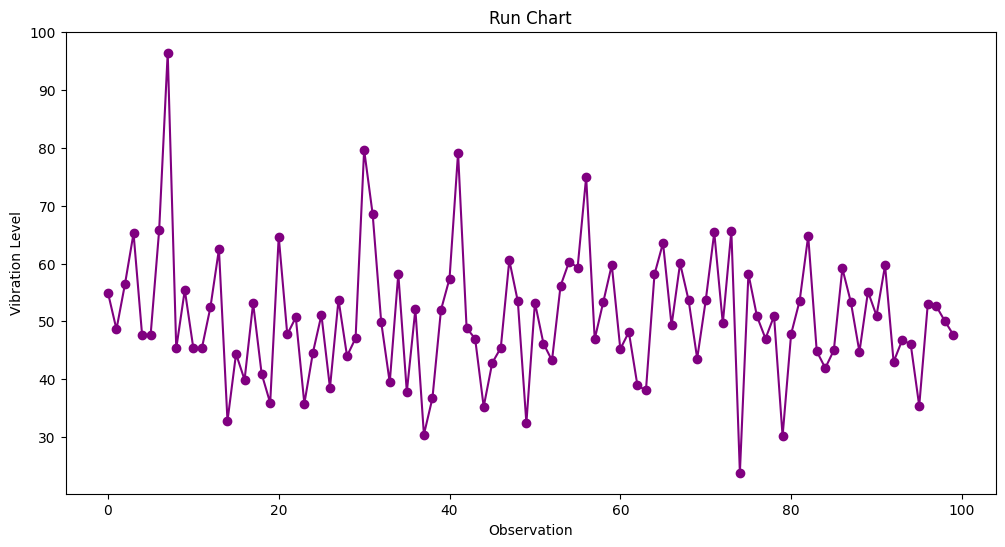

<Figure size 1200x600 with 0 Axes>

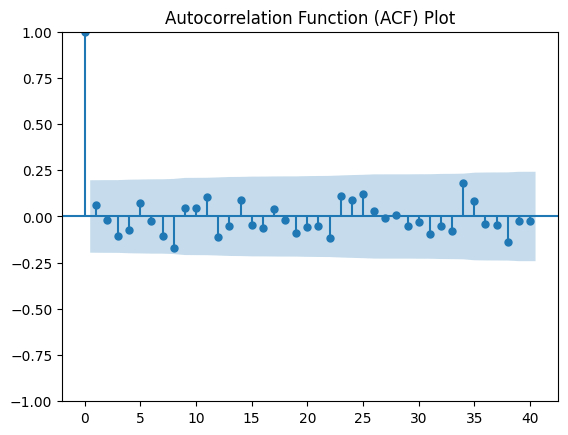

ADF Statistic: -9.238199161307769
p-value: 1.6089678527603692e-15
Critical Values: {'1%': np.float64(-3.498198082189098), '5%': np.float64(-2.891208211860468), '10%': np.float64(-2.5825959973472097)}
Shapiro-Wilk Statistic: 0.9579451912059787
p-value: 0.0028775819827284057


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Load the data
url = '/content/ac_compressor_vibration_data.csv'  # Replace with your actual file path
data = pd.read_csv(url)

# Display the first few rows of the dataframe
data.head()

# Check for missing values
data.isnull().sum()

# Fill missing values if any
data.fillna(method='ffill', inplace=True)

# Plot the distribution of the vibration data
plt.figure(figsize=(10, 6))
sns.histplot(data['Vibration'], kde=True, color='blue')
plt.title('Distribution of Vibration Data')
plt.xlabel('Vibration Level')
plt.ylabel('Frequency')
plt.show()

# Calculate the mean and range for each subgroup
subgroup_size = 5  # Define the subgroup size
data['Subgroup'] = np.arange(len(data)) // subgroup_size
subgroup_means = data.groupby('Subgroup')['Vibration'].mean()
subgroup_ranges = data.groupby('Subgroup')['Vibration'].max() - data.groupby('Subgroup')['Vibration'].min()

# Plot X-bar chart
plt.figure(figsize=(12, 6))
plt.plot(subgroup_means, marker='o', linestyle='-', color='b')
plt.axhline(y=subgroup_means.mean(), color='r', linestyle='--', label='Mean')
plt.title('X-bar Chart')
plt.xlabel('Subgroup')
plt.ylabel('Mean Vibration')
plt.legend()
plt.show()

# Plot R chart
plt.figure(figsize=(12, 6))
plt.plot(subgroup_ranges, marker='o', linestyle='-', color='g')
plt.axhline(y=subgroup_ranges.mean(), color='r', linestyle='--', label='Mean Range')
plt.title('R Chart')
plt.xlabel('Subgroup')
plt.ylabel('Range of Vibration')
plt.legend()
plt.show()

# Plot Run Chart
plt.figure(figsize=(12, 6))
plt.plot(data['Vibration'], marker='o', linestyle='-', color='purple')
plt.title('Run Chart')
plt.xlabel('Observation')
plt.ylabel('Vibration Level')
plt.show()

# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(data['Vibration'], lags=40, alpha=0.05)
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

# Perform Augmented Dickey-Fuller test
result = adfuller(data['Vibration'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Perform Shapiro-Wilk test for normality
stat, p = stats.shapiro(data['Vibration'])
print('Shapiro-Wilk Statistic:', stat)
print('p-value:', p)